<a href="https://colab.research.google.com/github/Eliezerguimaraes/ml_diabetes/blob/main/Diabetes_ATVD_10___MINERA%C3%87%C3%83O_DE_DADOS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Desafio 1

Faça a leitura da base de dados de diabetes e realize a divisão dos dados em variáveis explicativas e variável alvo (x e y).

In [ ]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [ ]:
dados = pd.read_csv('https://raw.githubusercontent.com/Eliezerguimaraes/ml_diabetes/main/diabetes.csv')
dados.head()

,glicemia,pressao_sanguinea,dobra_cutane_triceps,insulina,imc,diabetes
0,66,23,94,28.1,167.000,0
1,40,35,168,43.1,2.288,1
2,50,32,88,31.0,248.000,1
3,70,45,543,30.5,158.000,1
4,60,23,846,30.1,398.000,1


In [ ]:
info = dados.info()
info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 394 entries, 0 to 393
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   glicemia              394 non-null    int64  
 1   pressao_sanguinea     394 non-null    int64  
 2   dobra_cutane_triceps  394 non-null    int64  
 3   insulina              394 non-null    float64
 4   imc                   394 non-null    float64
 5   diabetes              394 non-null    int64  
dtypes: float64(2), int64(4)
memory usage: 18.6 KB


### Desafio 2

Realize a divisão dos dados entre treino e teste.

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
SEED = 5
x = dados.drop('diabetes', axis = 1)
y = dados['diabetes']

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.25, stratify=y, random_state=SEED)

### Desafio 3

Crie 2 modelos utilizando os algoritmos [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) e [RandomForestClassifer](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) e avalie a acurácia de treino e teste, escolhendo valores para o parâmetro `max_depth` para os modelos não se especializarem demais no padrão dos dados de treino.

In [ ]:
# DecisionTreeClassifier

#instaciar o modelo
dtc = DecisionTreeClassifier(max_depth=5)

#treinar o modelo
dtc.fit(x_treino, y_treino)

#testar modelo
previsoes_dtc = dtc.predict(x_teste)

#acuracia
acuracia_dtc = accuracy_score(y_teste, previsoes_dtc)
print(f'Acuracia: {acuracia_dtc}')

Acuracia: 0.6363636363636364


In [ ]:
# DecisionTreeClassifier2

#instaciar o modelo
dtc2 = DecisionTreeClassifier(max_depth=10)

#treinar o modelo
dtc2.fit(x_treino, y_treino)

#testar modelo
previsoes_dtc2 = dtc2.predict(x_teste)

#acuracia
acuracia_dtc2 = accuracy_score(y_teste, previsoes_dtc2)
print(f'Acuracia: {acuracia_dtc2}')

Acuracia: 0.5454545454545454


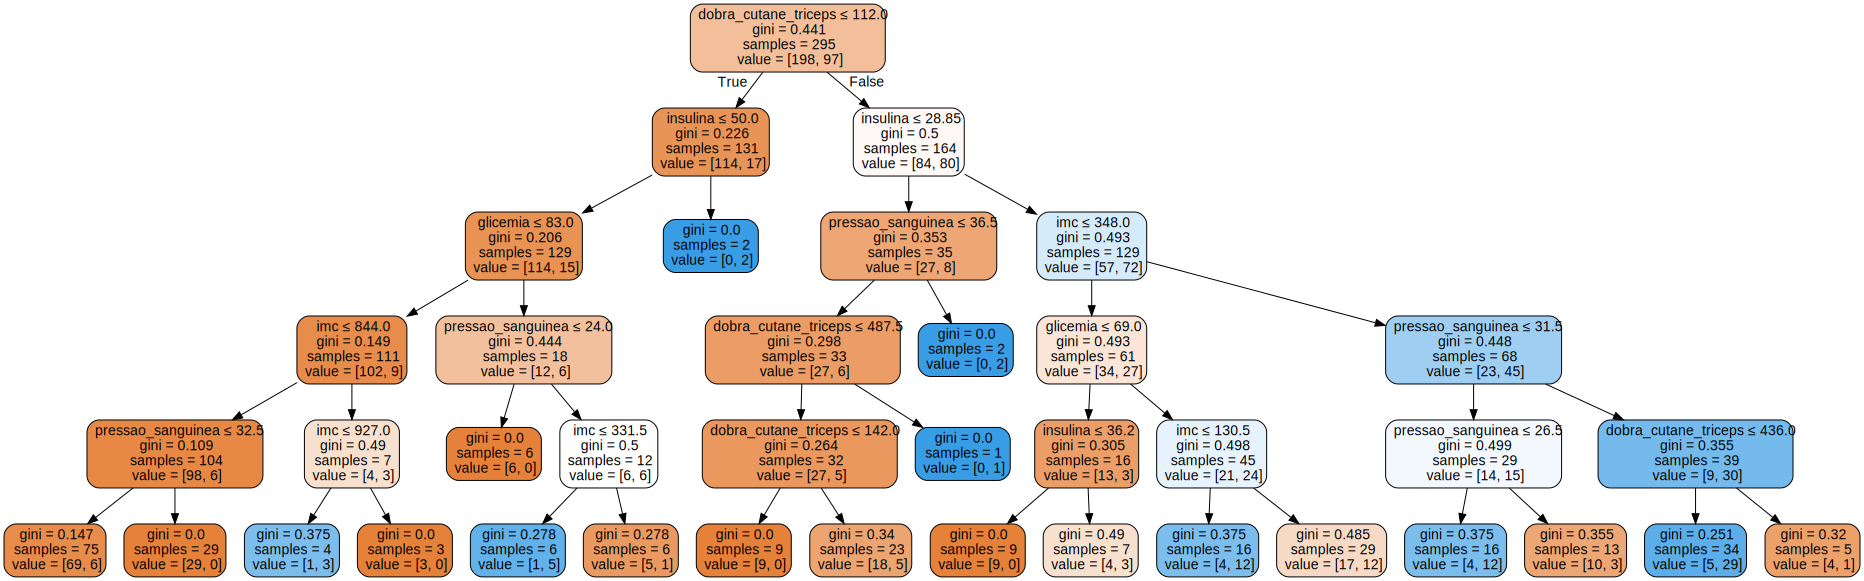

In [ ]:
#GRAPHVIZ
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(modelo, out_file=None,
                           feature_names=x.columns,
                           filled=True,
                           rounded=True,
                           special_characters=True)
graph = graphviz.Source(dot_data)
graph

In [ ]:
#RandomForestClassifer
from sklearn.ensemble import RandomForestClassifier

#instaciar o modelo
rfc = RandomForestClassifier(max_depth=5)

#treinar o modelo
rfc.fit(x_treino, y_treino)

#testar modelo
previsoes_rfc = rfc.predict(x_teste)

#acuracia
acuracia_rfc = accuracy_score(y_teste, previsoes_rfc)
print(f'Acuracia: {acuracia_rfc}')


Acuracia: 0.6464646464646465


In [ ]:
#RandomForestClassifer2
from sklearn.ensemble import RandomForestClassifier

#instaciar o modelo
rfc2 = RandomForestClassifier(max_depth=10)

#treinar o modelo
rfc2.fit(x_treino, y_treino)

#testar modelo
previsoes_rfc2 = rfc2.predict(x_teste)

#acuracia
acuracia_rfc2 = accuracy_score(y_teste, previsoes_rfc2)
print(f'Acuracia: {acuracia_rfc2}')

Acuracia: 0.6262626262626263


### Desafio 4

Construa uma matriz de confusão para cada um dos modelos para avaliar o desempenho das previsões.

In [ ]:
#matriz confusão DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
mc_dtc = confusion_matrix(y_teste, previsoes_dtc)
mc_dtc

array([[48, 18],
       [18, 15]])

In [ ]:
#matriz confusão DecisionTreeClassifier2
from sklearn.metrics import confusion_matrix
mc_dtc2 = confusion_matrix(y_teste, previsoes_dtc2)
mc_dtc2

array([[40, 26],
       [19, 14]])

In [ ]:
#matriz confusão RandomForestClassifer
from sklearn.metrics import confusion_matrix
mc_rfc = confusion_matrix(y_teste, previsoes_rfc)
mc_rfc

array([[50, 16],
       [19, 14]])

In [ ]:
#matriz confusão RandomForestClassifer
from sklearn.metrics import confusion_matrix
mc_rfc2 = confusion_matrix(y_teste, previsoes_rfc2)
mc_rfc2

array([[51, 15],
       [22, 11]])

### Desafio 5

Extraia as métricas acurácia, recall, precisão e F1-Score dos modelos de classificação gerados

In [ ]:
#DecisionTreeClassifier
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

#acuracia
acuracia_dtc = accuracy_score(y_teste, previsoes_dtc)
print(f'Acuracia: {acuracia_dtc}')

#recall
recall_dtc = recall_score(y_teste, previsoes_dtc)
print(f'Recall: {recall_dtc}')

#precisao
precisao_dtc = precision_score(y_teste, previsoes_dtc)
print(f'Precisao: {precisao_dtc}')

#f1_score
f1_score_dtc = f1_score(y_teste, previsoes_dtc)
print(f'F1_Score: {f1_score_dtc}')

Acuracia: 0.6363636363636364
Recall: 0.45454545454545453
Precisao: 0.45454545454545453
F1_Score: 0.45454545454545453


In [ ]:
#DecisionTreeClassifier2
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

#acuracia
acuracia_dtc2 = accuracy_score(y_teste, previsoes_dtc2)
print(f'Acuracia: {acuracia_dtc2}')

#recall
recall_dtc2 = recall_score(y_teste, previsoes_dtc2)
print(f'Recall: {recall_dtc2}')

#precisao
precisao_dtc2 = precision_score(y_teste, previsoes_dtc2)
print(f'Precisao: {precisao_dtc2}')

#f1_score
f1_score_dtc2 = f1_score(y_teste, previsoes_dtc2)
print(f'F1_Score: {f1_score_dtc2}')

Acuracia: 0.5454545454545454
Recall: 0.42424242424242425
Precisao: 0.35
F1_Score: 0.3835616438356164


In [ ]:
#RandomForestClassifer
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

#acuracia
acuracia_rfc = accuracy_score(y_teste, previsoes_rfc)
print(f'Acuracia: {acuracia_rfc}')

#recall
recall_rfc = recall_score(y_teste, previsoes_rfc)
print(f'Recall: {recall_rfc}')

#precisao
precisao_rfc = precision_score(y_teste, previsoes_rfc)
print(f'Precisao: {precisao_rfc}')

#f1_score
f1_score_rfc = f1_score(y_teste, previsoes_rfc)
print(f'F1_Score: {f1_score_rfc}')

Acuracia: 0.6464646464646465
Recall: 0.42424242424242425
Precisao: 0.4666666666666667
F1_Score: 0.4444444444444445


In [ ]:
#RandomForestClassifer2
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

#acuracia
acuracia_rfc2 = accuracy_score(y_teste, previsoes_rfc2)
print(f'Acuracia: {acuracia_rfc2}')

#recall
recall_rfc2 = recall_score(y_teste, previsoes_rfc2)
print(f'Recall: {recall_rfc2}')

#precisao
precisao_rfc2 = precision_score(y_teste, previsoes_rfc2)
print(f'Precisao: {precisao_rfc2}')

#f1_score
f1_score_rfc2 = f1_score(y_teste, previsoes_rfc2)
print(f'F1_Score: {f1_score_rfc2}')

Acuracia: 0.6262626262626263
Recall: 0.3333333333333333
Precisao: 0.4230769230769231
F1_Score: 0.3728813559322034


### Desafio 6

Obtenha a curva ROC e a métrica AUC dos modelos de classificação gerados no desafio da aula 1, comparando as curvas no mesmo gráfico.

*Como uma dica, vasculhe a documentação do `Scikit-learn` a partir deste [link](https://scikit-learn.org/stable/auto_examples/release_highlights/plot_release_highlights_0_22_0.html#new-plotting-api) e verifique uma forma de apresentar os resultados das curvas no mesmo gráfico usando o matplotlib*

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score, auc
import matplotlib.pyplot as plt

In [ ]:
# Calculando as probabilidades de predição para cada modelo
dtc_probs = dtc.predict_proba(x_teste)[:, 1]
dtc2_probs = dtc2.predict_proba(x_teste)[:, 1]
rfc_probs = rfc.predict_proba(x_teste)[:, 1]
rfc2_probs = rfc2.predict_proba(x_teste)[:, 1]

# Calculando a curva ROC para cada modelo
fpr_dtc, tpr_dtc, _ = roc_curve(y_teste, dtc_probs)
fpr_dtc2, tpr_dtc2, _ = roc_curve(y_teste, dtc2_probs)
fpr_rfc, tpr_rfc, _ = roc_curve(y_teste, rfc_probs)
fpr_rfc2, tpr_rfc2, _ = roc_curve(y_teste, rfc2_probs)

# Calculando a AUC para cada modelo
auc_dtc = auc(fpr_dtc, tpr_dtc)
auc_dtc2 = auc(fpr_dtc2, tpr_dtc2)
auc_rfc = auc(fpr_rfc, tpr_rfc)
auc_rfc2 = auc(fpr_rfc2, tpr_rfc2)

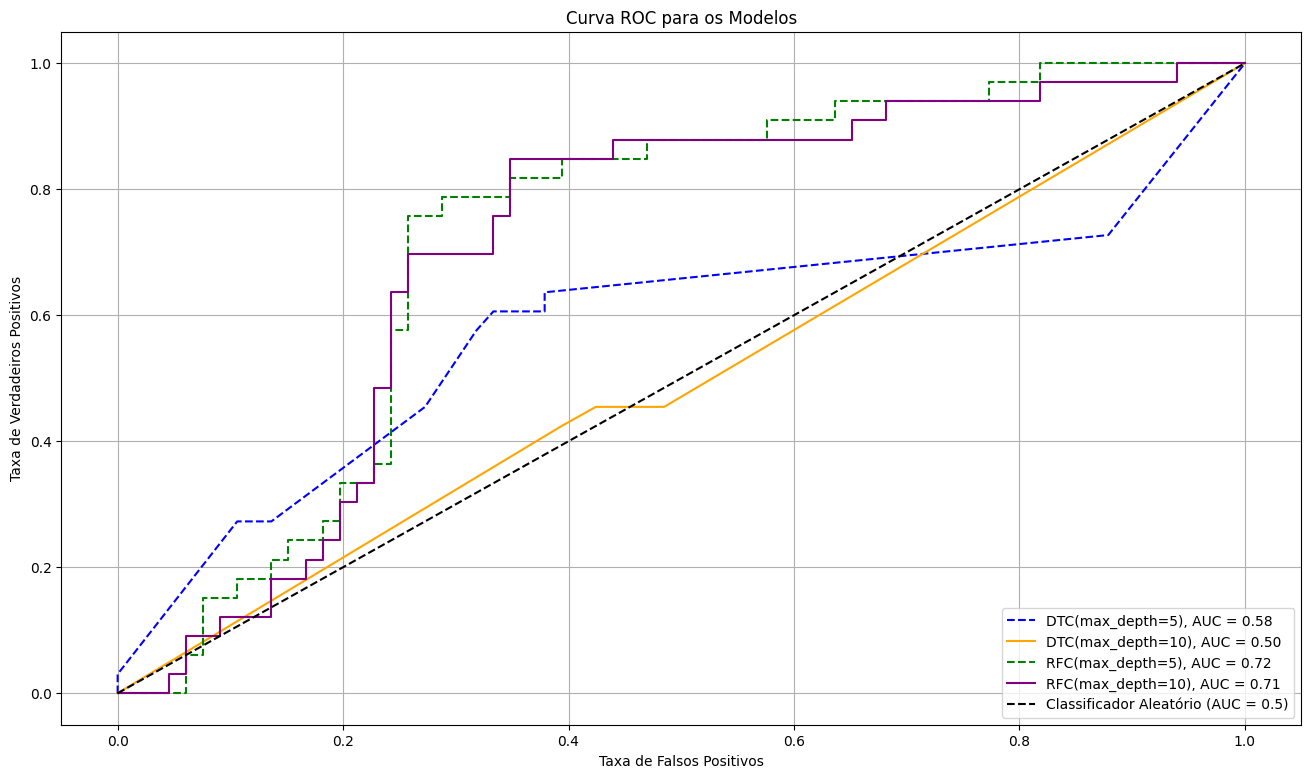

In [ ]:
plt.figure(figsize=(16, 9))
plt.plot(fpr_dtc, tpr_dtc, label=f'DTC(max_depth=5), AUC = {auc_dtc:.2f}', linestyle='--', color='blue')
plt.plot(fpr_dtc2, tpr_dtc2, label=f'DTC(max_depth=10), AUC = {auc_dtc2:.2f}', linestyle='-', color='orange')
plt.plot(fpr_rfc, tpr_rfc, label=f'RFC(max_depth=5), AUC = {auc_rfc:.2f}', linestyle='--', color='green')
plt.plot(fpr_rfc2, tpr_rfc2, label=f'RFC(max_depth=10), AUC = {auc_rfc2:.2f}', linestyle='-', color='purple')


plt.plot([0, 1], [0, 1], 'k--', label='Classificador Aleatório (AUC = 0.5)')


plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC para os Modelos')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

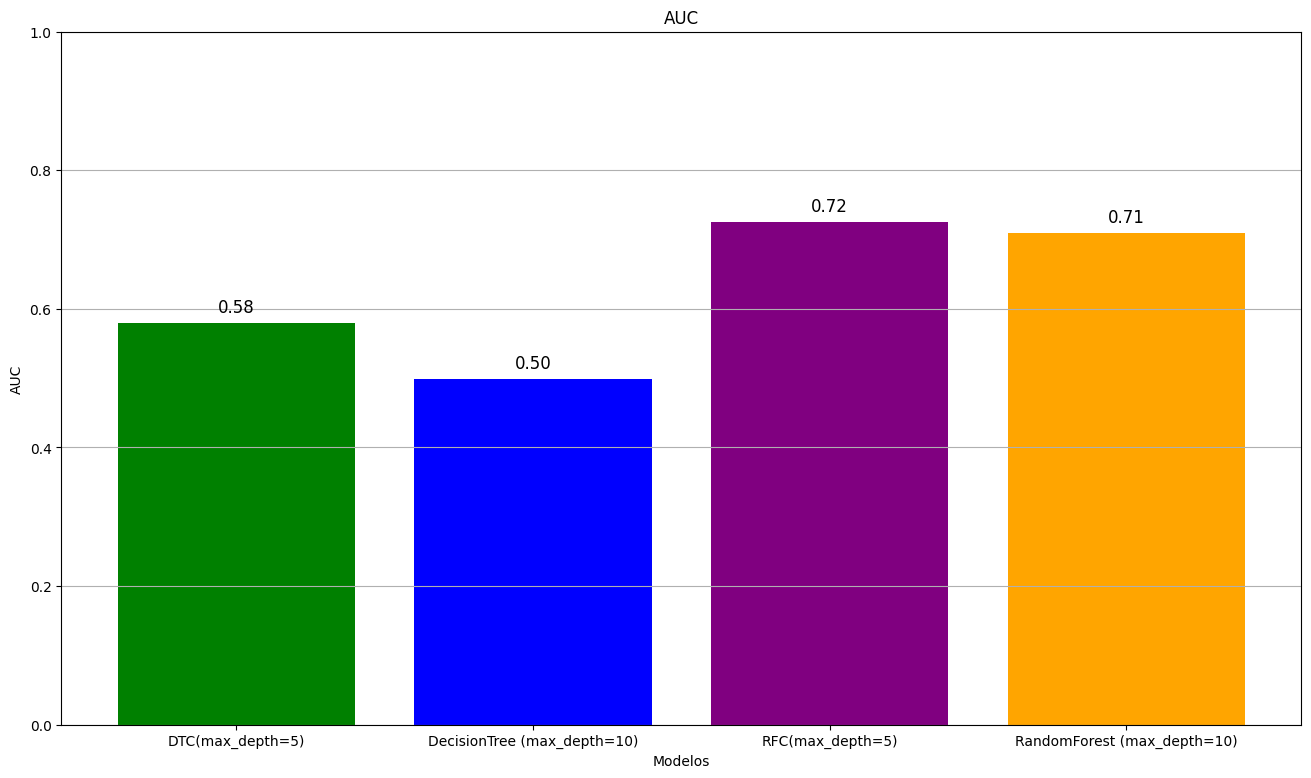

In [ ]:
plt.figure(figsize=(16, 9))
modelos = ['DTC(max_depth=5)', 'DecisionTree (max_depth=10)',
           'RFC(max_depth=5)', 'RandomForest (max_depth=10)']
valores_auc = [auc_dtc, auc_dtc2, auc_rfc, auc_rfc2]

bars = plt.bar(modelos, valores_auc, color=['green', 'blue', 'purple', 'orange',])
plt.ylim(0, 1)
plt.xlabel('Modelos')
plt.ylabel('AUC')
plt.title('AUC')
plt.grid(axis='y')


for bar in bars:
    yval = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        yval + 0.01,
        f'{yval:.2f}',
        ha='center',
        va='bottom',
        fontsize=12
    )

# Exibindo o gráfico de barras
plt.show()

### Desafio 7

Obtenha a curva precisão x recall e a métrica AP dos modelos de classificação gerados, comparando as curvas no mesmo gráfico.

*Como uma dica, vasculhe a documentação do `Scikit-learn` a partir deste [link](https://scikit-learn.org/stable/auto_examples/release_highlights/plot_release_highlights_0_22_0.html#new-plotting-api) e verifique uma forma de apresentar os resultados das curvas no mesmo gráfico usando o matplotlib*

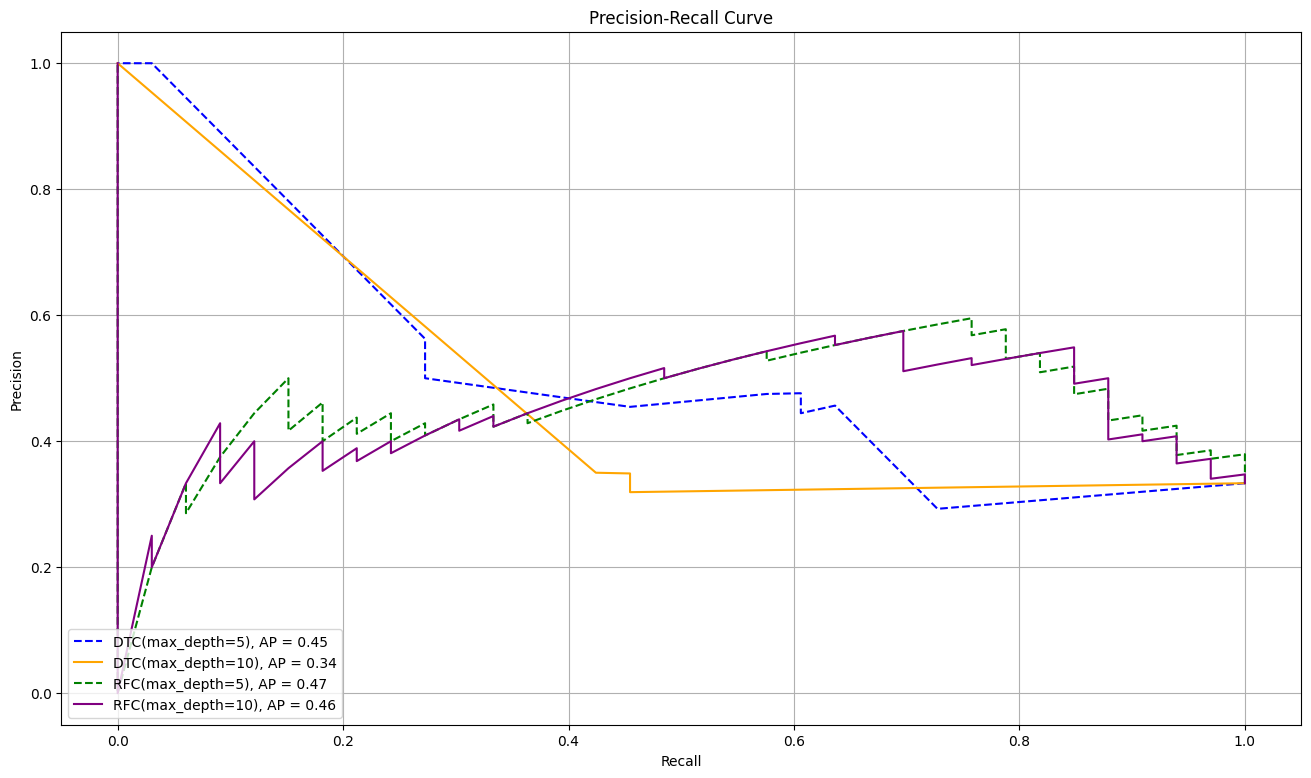

In [ ]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

dtc_probs = dtc.predict_proba(x_teste)[:, 1]
dtc2_probs = dtc2.predict_proba(x_teste)[:, 1]
rfc_probs = rfc.predict_proba(x_teste)[:, 1]
rfc2_probs = rfc2.predict_proba(x_teste)[:, 1]

precision_dtc, recall_dtc, _ = precision_recall_curve(y_teste, dtc_probs)
precision_dtc2, recall_dtc2, _ = precision_recall_curve(y_teste, dtc2_probs)
precision_rfc, recall_rfc, _ = precision_recall_curve(y_teste, rfc_probs)
precision_rfc2, recall_rfc2, _ = precision_recall_curve(y_teste, rfc2_probs)

ap_dtc = average_precision_score(y_teste, dtc_probs)
ap_dtc2 = average_precision_score(y_teste, dtc2_probs)
ap_rfc = average_precision_score(y_teste, rfc_probs)
ap_rfc2 = average_precision_score(y_teste, rfc2_probs)

plt.figure(figsize=(16, 9))
plt.plot(recall_dtc, precision_dtc, label=f'DTC(max_depth=5), AP = {ap_dtc:.2f}', linestyle='--', color='blue')
plt.plot(recall_dtc2, precision_dtc2, label=f'DTC(max_depth=10), AP = {ap_dtc2:.2f}', linestyle='-', color='orange')
plt.plot(recall_rfc, precision_rfc, label=f'RFC(max_depth=5), AP = {ap_rfc:.2f}', linestyle='--', color='green')
plt.plot(recall_rfc2, precision_rfc2, label=f'RFC(max_depth=10), AP = {ap_rfc2:.2f}', linestyle='-', color='purple')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()

### Desafio 8

Gere os relatórios de métricas dos modelos de classificação gerados.

In [ ]:
from sklearn.metrics import classification_report
from tabulate import tabulate

# Lista de modelos e nomes
models = [dtc, dtc2, rfc, rfc2]
model_names = ['DTC(max_depth=5)', 'DTC(max_depth=10)',
               'RFC(max_depth=5)', 'RFC(max_depth=10)']

# Gerando os relatórios de classificação para cada modelo e formatando em tabela
for model, name in zip(models, model_names):
    print(f"Relatório de Classificação para o modelo {name}:")

    # Gerando o relatório de classificação como dicionário
    report_dict = classification_report(y_teste, model.predict(x_teste), output_dict=True)

    # Convertendo o relatório para um formato tabulado
    report_table = []

    # Preenchendo a tabela com as métricas
    for label, metrics in report_dict.items():
        if label in ['accuracy', 'macro avg', 'weighted avg']:
            continue  # Ignorar essas linhas para um formato mais limpo

        row = [label] + [metrics[metric] for metric in ['precision', 'recall', 'f1-score', 'support']]
        report_table.append(row)

    # Adicionando precisão, recall e f1-score
    averages = ['macro avg', 'weighted avg']
    for avg in averages:
        avg_row = [avg] + [report_dict[avg][metric] for metric in ['precision', 'recall', 'f1-score', 'support']]
        report_table.append(avg_row)

    # Exibindo a tabela com tabulate
    headers = ['Classe', 'Precisão', 'Recall', 'F1-Score', 'Suporte']
    print(tabulate(report_table, headers=headers, tablefmt='grid'))

Relatório de Classificação para o modelo DTC(max_depth=5):
+--------------+------------+----------+------------+-----------+
| Classe       |   Precisão |   Recall |   F1-Score |   Suporte |
+==============+============+==========+============+===========+
| 0            |   0.727273 | 0.727273 |   0.727273 |        66 |
+--------------+------------+----------+------------+-----------+
| 1            |   0.454545 | 0.454545 |   0.454545 |        33 |
+--------------+------------+----------+------------+-----------+
| macro avg    |   0.590909 | 0.590909 |   0.590909 |        99 |
+--------------+------------+----------+------------+-----------+
| weighted avg |   0.636364 | 0.636364 |   0.636364 |        99 |
+--------------+------------+----------+------------+-----------+
Relatório de Classificação para o modelo DTC(max_depth=10):
+--------------+------------+----------+------------+-----------+
| Classe       |   Precisão |   Recall |   F1-Score |   Suporte |
+==============+=======

### Desafio 9

Crie uma função para calcular o intervalo de confiança dos resultados de uma validação cruzada com 2 desvios padrão. A função precisa ter um parâmetro para receber uma lista com os desempenhos da validação cruzada e outro para apresentar o nome do modelo utilizado na validação cruzada. Exemplo de retorno da função:

> Intervalo de confiança ("nome do modelo"): ["valor mínimo do intervalo", "valor máximo do intervalo"]



In [ ]:
import numpy as np

def intervalo_confianca_cv(resultados_cv, nome_modelo):

    # Calcula a média e o desvio padrão dos desempenhos
    media = np.mean(resultados_cv)
    desvio_padrao = np.std(resultados_cv)

    # Calcula o intervalo de confiança (95%) com 2 desvios padrão
    intervalo_minimo = media - 2 * desvio_padrao
    intervalo_maximo = media + 2 * desvio_padrao

    # Formatação do resultado
    resultado_formatado = f'Intervalo de confiança ({nome_modelo}): [{intervalo_minimo:.2f}, {intervalo_maximo:.2f}]'
    return resultado_formatado

# Exemplo de uso
resultados_cv = [0.85, 0.87, 0.89, 0.88, 0.86]  # Exemplo de desempenhos de validação cruzada
nome_modelo = 'RandomForest'
print(intervalo_confianca_cv(resultados_cv, nome_modelo))

Intervalo de confiança (RandomForest): [0.84, 0.90]


### Desafio 10

Avalie o desempenho dos modelos com um intervalo de confiança utilizando a validação cruzada com o método [`KFold`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html), usando 10 partes e embaralhando os dados antes da separação. Use o método [`cross_val_score`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) que não retorna o tempo de execução, apenas as métricas.

In [ ]:
from sklearn.model_selection import KFold, cross_val_score

# Lista de modelos e nomes
models = [dtc, dtc2, rfc, rfc2]
model_names = ['DTC(max_depth=5)', 'DTC(max_depth=10)',
               'RFC(max_depth=5)', 'RFC(max_depth=10)']

kf = KFold(n_splits=10, shuffle=True, random_state=SEED)


for model, name in zip(models, model_names):
    cv_scores = cross_val_score(model, x_treino, y_treino, cv=kf)

    # Calculando o intervalo de confiança
    intervalo = intervalo_confianca_cv(cv_scores, name)
    print(intervalo)

Intervalo de confiança (DTC(max_depth=5)): [0.48, 0.82]
Intervalo de confiança (DTC(max_depth=10)): [0.48, 0.83]
Intervalo de confiança (RFC(max_depth=5)): [0.55, 0.89]
Intervalo de confiança (RFC(max_depth=10)): [0.52, 0.86]


### Desafio 11

Avalie o desempenho dos modelos com um intervalo de confiança utilizando a validação cruzada (`cross_val_score`) com o método [`StratifiedKFold`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html#sklearn.model_selection.StratifiedKFold), usando 10 partes e embaralhando os dados antes da separação e avaliando a métrica F1-Score.

In [ ]:
from sklearn.model_selection import StratifiedKFold

# Lista de modelos e nomes
models = [dtc, dtc2, rfc, rfc2]
model_names = ['DTC(max_depth=5)', 'DTC(max_depth=10)',
               'RFC(max_depth=5)', 'RFC(max_depth=10)']

skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=SEED)


for model, name in zip(models, model_names):
    cv_scores = cross_val_score(model, x_treino, y_treino, cv=skf, scoring='f1')

    # Calculando o intervalo de confiança
    intervalo = intervalo_confianca_cv(cv_scores, name)
    print(intervalo)

Intervalo de confiança (DTC(max_depth=5)): [0.13, 0.84]
Intervalo de confiança (DTC(max_depth=10)): [0.12, 0.81]
Intervalo de confiança (RFC(max_depth=5)): [0.13, 0.81]
Intervalo de confiança (RFC(max_depth=10)): [-0.05, 0.92]


### Desafio 12

Avalie o desempenho dos modelos utilizando a validação cruzada (`cross_val_score`) com o método [`LeaveOneOut`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.LeaveOneOut.html).

O método LeaveOneOut vai gerar um modelo para cada uma das linhas da base de dados, portanto a lista de resultados terá taxa de acerto apenas de 0 ou 1 para cada modelo. Dessa forma, extraia apenas a média do resultado, sem utilizar o intervalo de confiança.


In [ ]:
import numpy as np
from sklearn.model_selection import LeaveOneOut

# Lista de modelos e nomes
models = [dtc, dtc2, rfc, rfc2]
model_names = ['DTC(max_depth=5)', 'DTC(max_depth=10)',
               'RFC(max_depth=5)', 'RFC(max_depth=10)']

loo = LeaveOneOut()

for model, name in zip(models, model_names):
    cv_scores = cross_val_score(model, x_treino, y_treino, cv=loo)

    # Calculando a média dos resultados
    media_acuracia = np.mean(cv_scores)
    print(f"Acurácia média para {name} com LeaveOneOut: {media_acuracia:.2f}")

Acurácia média para DTC(max_depth=5) com LeaveOneOut: 0.64
Acurácia média para DTC(max_depth=10) com LeaveOneOut: 0.68
Acurácia média para RFC(max_depth=5) com LeaveOneOut: 0.70
Acurácia média para RFC(max_depth=10) com LeaveOneOut: 0.69


### Desafio 13

Verifique a proporção de dados da variável alvo do conjunto de dados de diabetes. Essa análise pode ser feita a partir da porcentagem de dados ou com a utilização de um gráfico de contagem para entender se há um desbalanceamento de dados.

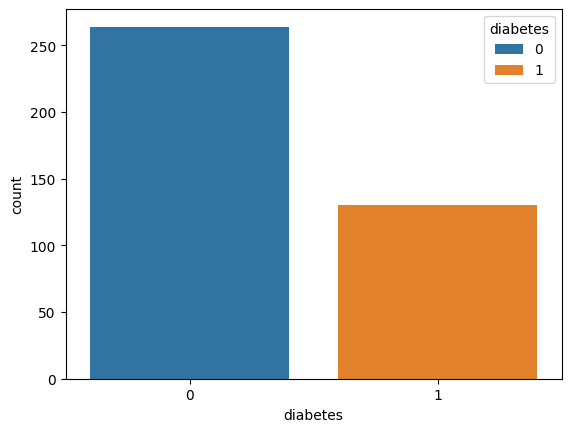

In [ ]:
import seaborn as sns

ax = sns.countplot(x='diabetes', hue = 'diabetes', data=dados)

### Desafio 14

Utilize um [`pipeline`](https://imbalanced-learn.org/stable/references/generated/imblearn.pipeline.Pipeline.html) contendo ajuste do modelo e o balanceamento dos dados usando o oversampling com [`SMOTE`](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html), obtendo a média do F1-Score de uma validação cruzada com `StratifiedKFold`.

In [ ]:
import numpy as np
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE


skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=SEED)

pipeline = Pipeline([
    ('oversampling', SMOTE(random_state=SEED)),
    ('modelo', rfc2)
])

cv_scores = cross_val_score(pipeline, x_treino, y_treino, cv=skf, scoring='f1')
media_f1_score = np.mean(cv_scores)

print(f"Média do F1-Score com SMOTE e validação cruzada: {media_f1_score:.2f}")

Média do F1-Score com SMOTE e validação cruzada: 0.53


### Desafio 15

 Utilize um [`pipeline`](https://imbalanced-learn.org/stable/references/generated/imblearn.pipeline.Pipeline.html) contendo ajuste do modelo e o balanceamento dos dados usando o undersampling com [`Nearmiss`](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html) na sua versão 3, obtendo a média do F1-Score de uma validação cruzada com `StratifiedKFold`.

In [ ]:
import numpy as np
from imblearn.under_sampling import NearMiss
from imblearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score

skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=SEED)

rfc2 = RandomForestClassifier(max_depth=10, random_state=SEED)

# Criando o pipeline com NearMiss
pipeline = Pipeline([
    ('undersampling', NearMiss(version=3)),
    ('modelo', rfc2)
])

# Calculando a média do F1-Score com validação cruzada estratificada
cv_scores = cross_val_score(pipeline, x_treino, y_treino, cv=skf, scoring='f1')
media_f1_score = np.mean(cv_scores)

print(f"Média do F1-Score com NearMiss e validação cruzada: {media_f1_score:.2f}")

Média do F1-Score com NearMiss e validação cruzada: 0.52


### Desafio 16

Escolha o modelo que obteve o melhor desempenho ao comparar as estratégias de oversampling e undersampling e realize o teste do modelo nos dados de teste que foram separados no início dos desafios.

In [ ]:
pipeline = Pipeline([
    ('oversampling', SMOTE(random_state=SEED)),
    ('modelo', rfc2)
])


pipeline.fit(x_treino, y_treino,)
y_pred = pipeline.predict(x_teste)

report = classification_report(y_teste, y_pred, output_dict=True)

report_df = pd.DataFrame(report).transpose()
print(report_df)


              precision    recall  f1-score   support
0              0.790323  0.742424  0.765625  66.00000
1              0.540541  0.606061  0.571429  33.00000
accuracy       0.696970  0.696970  0.696970   0.69697
macro avg      0.665432  0.674242  0.668527  99.00000
weighted avg   0.707062  0.696970  0.700893  99.00000
